In [ ]:
# Import packages
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [1]:
# Read in Ising configuration files
file_name = "Ising2DFM_reSample_L40_T=All.pkl" # This file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
data = pickle.load(open(file_name,'rb'))
data = np.unpackbits(data).reshape(-1, 1600)
data=data.astype('int')
data[np.where(data == 0)] = -1 # Map 0 state to -1

file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl" # This file contains 16*10000 labels taken in T=np.arange(0.25,4.0001,0.25)
labels = pickle.load(open(file_name, 'rb')) # Pickle reads the file and returns a 1D array with the binary labels

mask_ordered = labels == 1
mask_unordered = labels == 0

In [2]:
# Calculate magnetization
mag = np.sum(data, axis=1)/len(data[0,:])

In [3]:
# Perform PCA
pca = PCA(n_components = 50)
PCC = pca.fit_transform(data)
print(pca.explained_variance_ratio_)  

[0.51641684 0.00413209 0.00382928 0.00379066 0.00371111 0.00308506
 0.00301656 0.00296425 0.00293335 0.00237678 0.0023244  0.00231728
 0.00228245 0.00212257 0.00211401 0.00210034 0.00207556 0.00207008
 0.00206052 0.00202394 0.00202287 0.00168014 0.00167527 0.00165355
 0.0016398  0.00159426 0.00158946 0.00158177 0.00156792 0.00151523
 0.00150982 0.0015044  0.001492   0.00148277 0.00148066 0.0014727
 0.00146503 0.00131576 0.00130472 0.00130293 0.00128825 0.00127866
 0.00126726 0.00126056 0.00122524 0.00115611 0.00115338 0.00115241
 0.00112553 0.00112096]


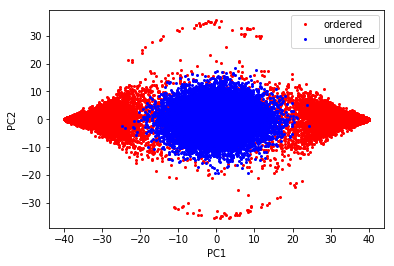

In [7]:
# Plot the first two principal components
plt.plot(PCC[mask_ordered,0], PCC[mask_ordered,1], 'ro', markersize=2, rasterized=True)
plt.plot(PCC[mask_unordered,0], PCC[mask_unordered,1], 'bo', markersize = 2, rasterized=True)
plt.legend(['ordered', 'unordered'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('PC1PC2.pdf', dpi=300)

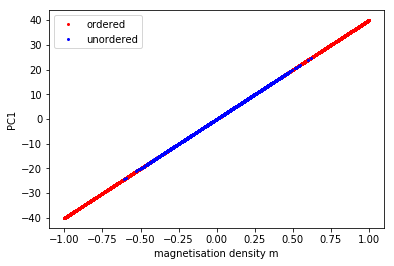

In [8]:
# Plot first principal component over magnetization
plt.plot(mag[mask_ordered], -PCC[mask_ordered,0], 'ro', markersize =2, rasterized=True)
plt.plot(mag[mask_unordered], -PCC[mask_unordered,0], 'bo', markersize = 2, rasterized=True)
plt.legend(['ordered', 'unordered'])
plt.xlabel('magnetisation density m')
plt.ylabel('PC1')
plt.savefig('PC1Mag.pdf', dpi = 300)

[0.51641684 0.00413209 0.00382928 0.00379066 0.00371111 0.00308506
 0.00301656 0.00296425 0.00293335 0.00237678 0.0023244  0.00231728
 0.00228245 0.00212257 0.00211401 0.00210034 0.00207556 0.00207008
 0.00206052 0.00202394 0.00202287 0.00168014 0.00167527 0.00165355
 0.0016398  0.00159426 0.00158946 0.00158177 0.00156792 0.00151523
 0.00150982 0.0015044  0.001492   0.00148277 0.00148066 0.0014727
 0.00146503 0.00131576 0.00130472 0.00130293 0.00128825 0.00127866
 0.00126726 0.00126056 0.00122524 0.00115611 0.00115338 0.00115241
 0.00112553 0.00112096]


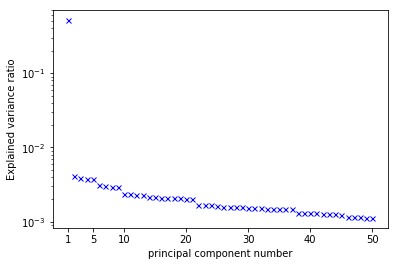

In [6]:
# Examine the explained variance ratio
print(pca.explained_variance_ratio_)  

plt.semilogy(np.arange(1,51), pca.explained_variance_ratio_, 'bx', markersize = 5)
plt.xlabel('principal component number')
plt.ylabel('Explained variance ratio')
plt.xticks(np.array([1,5,10,20,30,40,50]), [1,5,10,20,30,40,50])
plt.savefig('ExplainedVar_Ising.pdf')